In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
def as_si(x, ndp):
    """Returns number in scientific format for latex. For PyPlot when latex output is needed. 
    Latex distibtuion must be installed on the machine. Also set  plt.rcParams["text.usetex"] =True
    Parameters
    ----------
    x
        the input number
    ndp : int
        desired number of decimals
    """
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'${m:s}\times 10^{{{e:d}}}$'.format(m=m, e=int(e))

import fur.path_assistant as path_assistant
shift = path_assistant.PathAssistant('shift_03_10_2020')

In [2]:
meas = pd.read_csv(shift.get_results_dir().fi('meas_FLAT_ND_FILTERS_03_10_2020.csv'), index_col=0)
theor = pd.read_csv(shift.get_results_dir().fi('theor_FLAT_ND_FILTERS_03_10_2020.csv'), index_col=0)
M = theor.loc[0,'M']
Mfit = theor.loc[0,'Mfit']

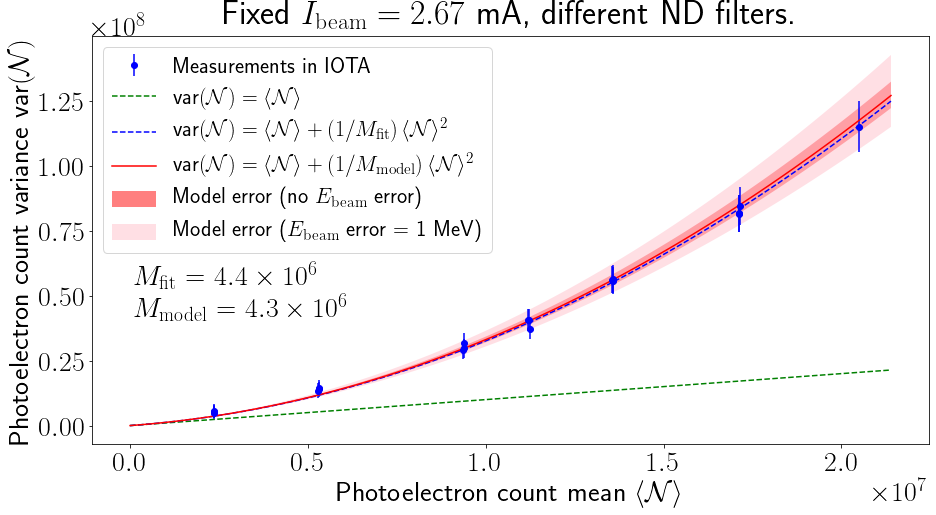

In [3]:
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(meas['N'], meas['varN'],marker='o',linestyle='None',yerr=meas['errorbar'],color='b', label = 'Measurements in IOTA')
ax.plot(theor['N'], theor['N'],color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")
ax.plot(theor['N'], theor['varN_fit'],color='blue', linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{fit}}\right)\langle\mathcal{N}\rangle^2$")
ax.plot(theor['N'], theor['varN'],color='red',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
ax.fill_between(theor['N'], theor.varN_bottom_no_Ebeam, theor.varN_top_no_Ebeam, facecolor='red', alpha=0.5, label='Model error (no $E_{\mathrm{beam}}$ error)')
ax.fill_between(theor['N'], theor.varN_bottom_with_Ebeam, theor.varN_top_with_Ebeam, facecolor='pink', alpha=0.5, label='Model error ($E_{\mathrm{beam}}$ error = 1 MeV)')
ax.legend()
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,0,1,2,3,4]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_title("Fixed $I_{\mathrm{beam}} = 2.67$ mA, different ND filters.")
ax.text(0.05,0.63-0.25,r"$M_{\mathrm{fit}}$"+" = {:s}".format(as_si(Mfit,1)),transform=ax.transAxes)
ax.text(0.05,0.55-0.25,r'$M_{\mathrm{model}}$'+' = {:s}'.format(as_si(M,1)),transform=ax.transAxes)
ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
#plt.savefig('/home/ilobach/FUR_Run2_experiment_paper/images/flat_nd.png',bbox_inches='tight',dpi=300)
plt.show()